# Plot lidar snow maps at MCS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import rioxarray as rxr
import os, glob

In [2]:
data_path = '/Volumes/LaCie/raineyaberle/Research/PhD/SnowMaL/study-sites/MCS/lidar'
fns = sorted(glob.glob(os.path.join(data_path, '*.tif')))
fns

['/Volumes/LaCie/raineyaberle/Research/PhD/SnowMaL/study-sites/MCS/lidar/20210310_MCS-snowdepth.tif',
 '/Volumes/LaCie/raineyaberle/Research/PhD/SnowMaL/study-sites/MCS/lidar/20220217_MCS-snowdepth.tif',
 '/Volumes/LaCie/raineyaberle/Research/PhD/SnowMaL/study-sites/MCS/lidar/20220317_MCS-snowdepth.tif',
 '/Volumes/LaCie/raineyaberle/Research/PhD/SnowMaL/study-sites/MCS/lidar/20220407_MCS-snowdepth.tif',
 '/Volumes/LaCie/raineyaberle/Research/PhD/SnowMaL/study-sites/MCS/lidar/20230405_MCS-snowdepth.tif',
 '/Volumes/LaCie/raineyaberle/Research/PhD/SnowMaL/study-sites/MCS/lidar/20240213_MCS-snowdepth_RFgapfilled.tif',
 '/Volumes/LaCie/raineyaberle/Research/PhD/SnowMaL/study-sites/MCS/lidar/20240315_MCS-snowdepth_RF_5m.tif']

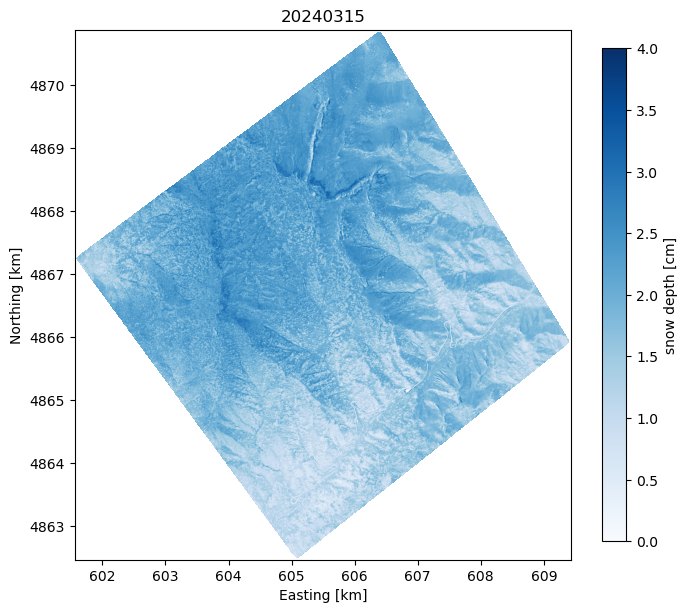

In [7]:
for fn in fns[-2:]:
    sd = rxr.open_rasterio(fn)
    date = os.path.basename(fn)[0:8]
    
    plt.figure(figsize=(8,8))
    im = plt.imshow(sd.data[0], cmap='Blues', clim=(0,4),
                    extent=(np.min(sd.x.data)/1e3, np.max(sd.x.data)/1e3,
                            np.min(sd.y.data)/1e3, np.max(sd.y.data)/1e3))
    plt.colorbar(im, shrink=0.8, label='snow depth [cm]')
    plt.title(date)
    plt.xlabel('Easting [km]')
    plt.ylabel('Northing [km]')

In [9]:
sd.max()

<xarray.DataArray ()> Size: 8B
array(3.59968366)
Coordinates:
    spatial_ref  int64 8B 0